In [47]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Data cleaning & Preprocessing

In [48]:
# reading the csv file -
df = pd.read_csv('loan_approval_dataset.csv')

In [49]:
# displaying the shape of the data -
df.shape

(4269, 13)

In [50]:
# displaying the basic info of the data -
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [51]:
# checking the data type of column -
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [52]:
# displaying top 5 rows of the dataset -
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [53]:
# checking for duplicate entries in the dataset -
df.duplicated().sum()

np.int64(0)

In [54]:
# dispalying the null values present in each column -
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [55]:
# dispaying the column name -
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [56]:
# removing unenecessary spaces from column name -
df.columns = df.columns.str.strip()

In [57]:
# displaying the unique value present in each categorical column -
column = ['education', 'self_employed', 'loan_status']

for col in column:
    print(col, df[col].unique())
    print(" ")

education [' Graduate' ' Not Graduate']
 
self_employed [' No' ' Yes']
 
loan_status [' Approved' ' Rejected']
 


In [58]:
# removing unecessary space from column entries(education, self_employed, loan_status)
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

In [59]:
# Displaying the value_counts(How many times a value is present in our dataset) of each categorical column -
column = ['education', 'self_employed', 'loan_status']

for col in column:
    print(col, df[col].value_counts())
    print(" ")

education education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
 
self_employed self_employed
Yes    2150
No     2119
Name: count, dtype: int64
 
loan_status loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
 


In [60]:
# creating a new featrure called total_assets (sum of all the assets)
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

In [61]:
# Dropping columns
df.drop(['loan_id','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],
        axis=1, inplace=True)

In [62]:
# displaying the categorical column  and numerical column present in our  data -
cat = df.select_dtypes(['object'])
cat_columns = cat.columns
print("Categorical columns:" , cat_columns)

num = df.select_dtypes(['int','float'])
num_columns = num.columns
print("Numerical columns:" , num_columns)

Categorical columns: Index(['education', 'self_employed', 'loan_status'], dtype='object')
Numerical columns: Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'total_assets'],
      dtype='object')


In [63]:
# Stats of the data -
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
total_assets,4269.0,3.254877e+07,1.950656e+07,400000.0,16300000.0,31500000.0,47200000.0,90700000.0


In [64]:
# describe(include="O") - only shows object columns
df.describe(include="O")

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


# Data Visualization

<Axes: >

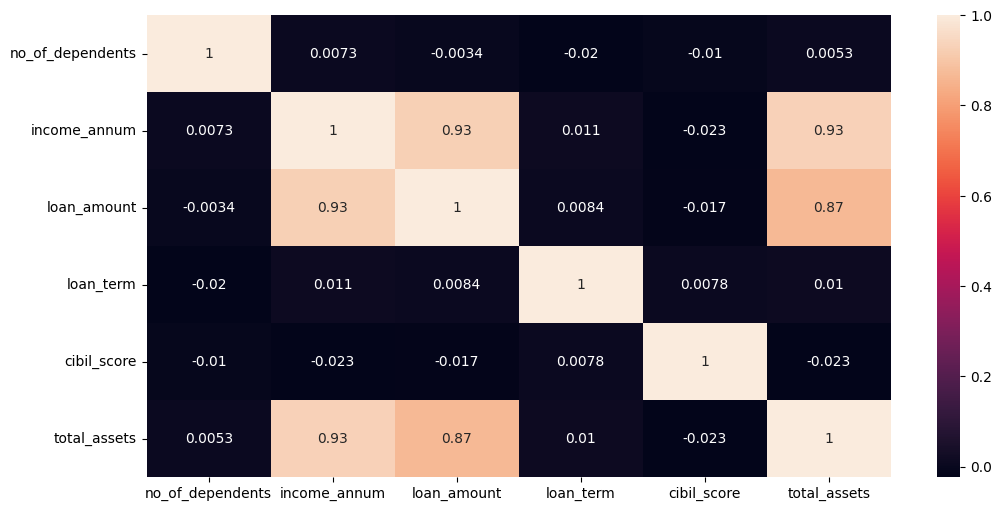

In [65]:
# Plotting a correlation matrix to check the correlation -
plt.figure(figsize=(12, 6))
numerical = df.select_dtypes(['int','float'])
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix, annot=True)

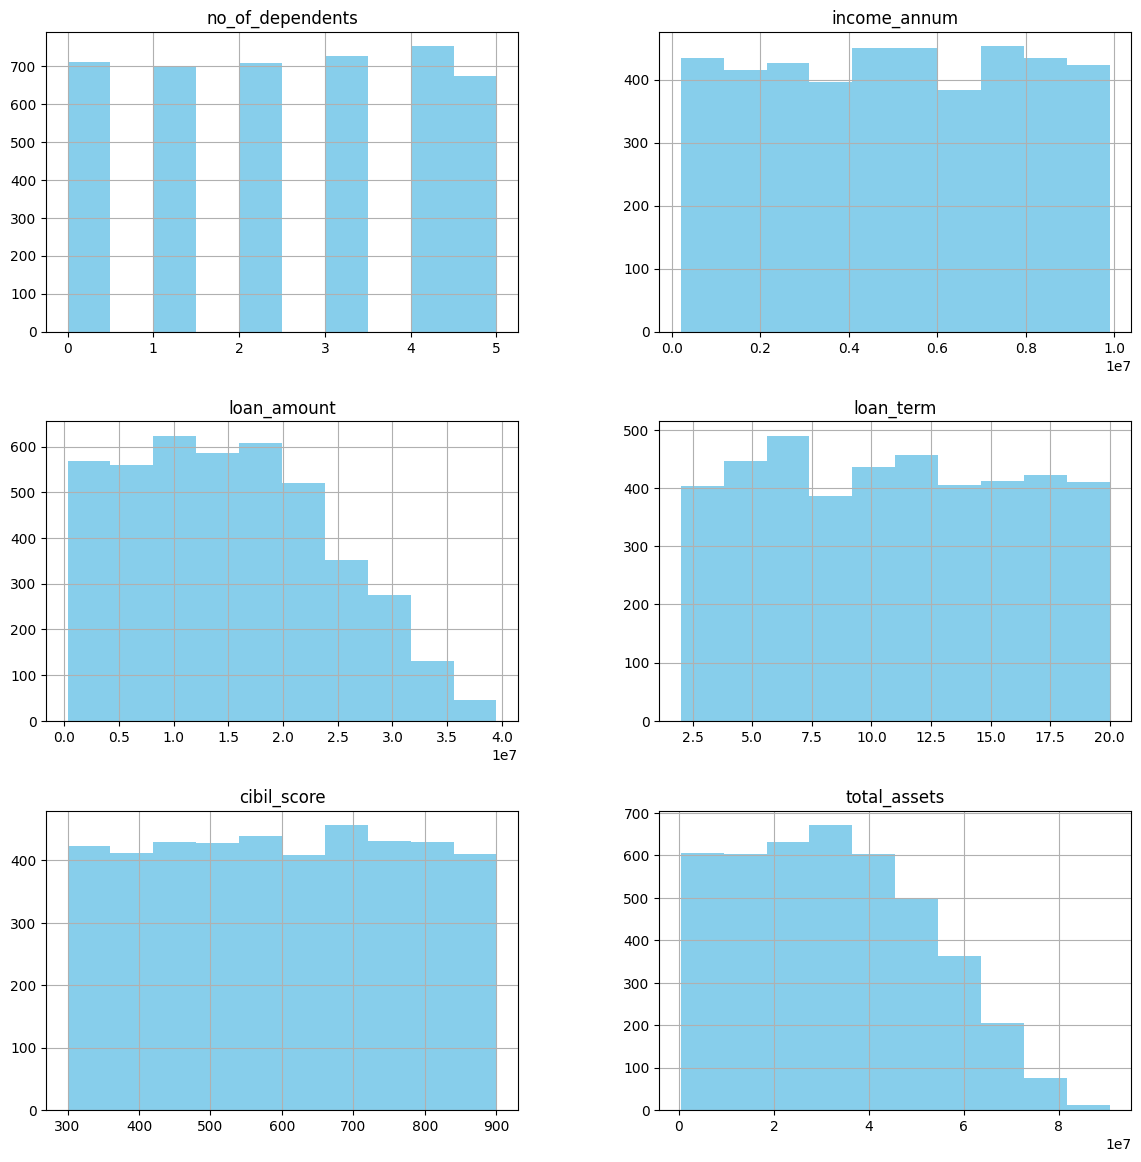

In [66]:
# Plotting Histogram for numerical columns to check the distribution of the data -
df.hist(figsize=(14,14) , color = 'skyblue');

In [67]:
# Check skewness
skewness_values = df[num_columns].skew()

# Display skewness
print("Skewness of Numerical Columns:")
print(skewness_values)

Skewness of Numerical Columns:
no_of_dependents   -0.017971
income_annum       -0.012814
loan_amount         0.308724
loan_term           0.036359
cibil_score        -0.009039
total_assets        0.297241
dtype: float64


# Data Visualization -

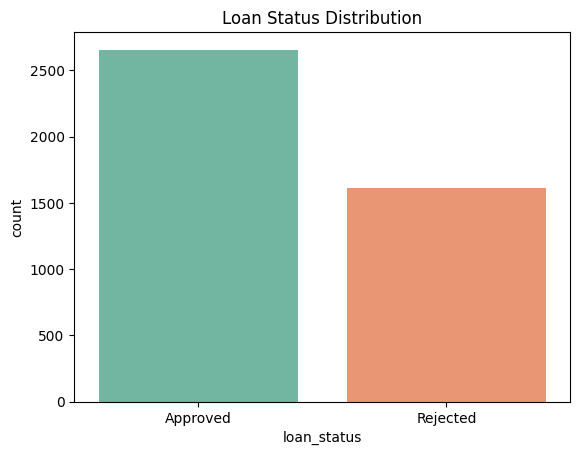

In [68]:
# Count plot for Status Distribution -
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title("Loan Status Distribution")
plt.show()

Text(0.5, 1.0, 'Education Distribution')

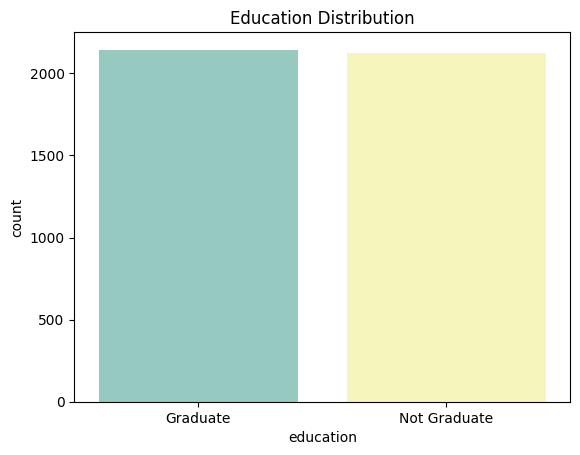

In [69]:
# Count plot for Status Distribution -
sns.countplot(data=df, x='education', palette='Set3')
plt.title("Education Distribution")

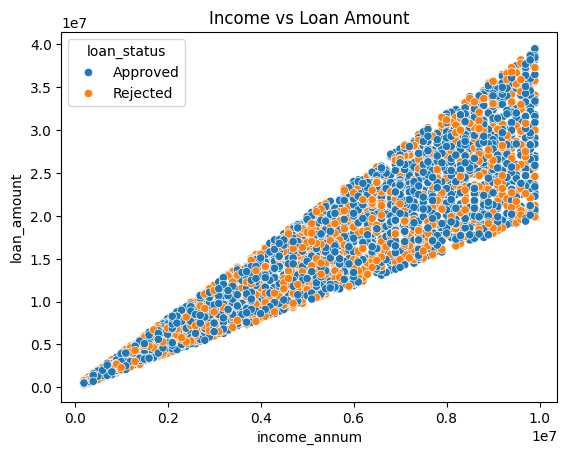

In [70]:
# scatter plot for 'income_annum' and 'loan_amount' with hue='loan_status'
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.title("Income vs Loan Amount")
plt.show()

Text(0.5, 1.0, 'Dependents vs Loan Status')

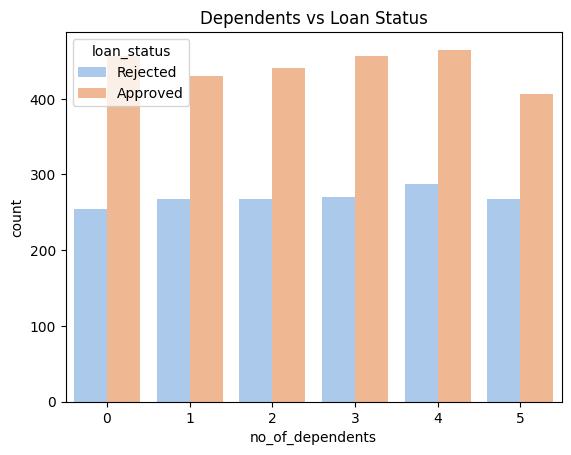

In [71]:
# PLotting a count plot for for number of dependents with hue = 'loan_status'
sns.countplot(data=df, x='no_of_dependents', hue='loan_status', palette='pastel')
plt.title("Dependents vs Loan Status")

Text(0.5, 1.0, 'Self-Employed vs Loan Status')

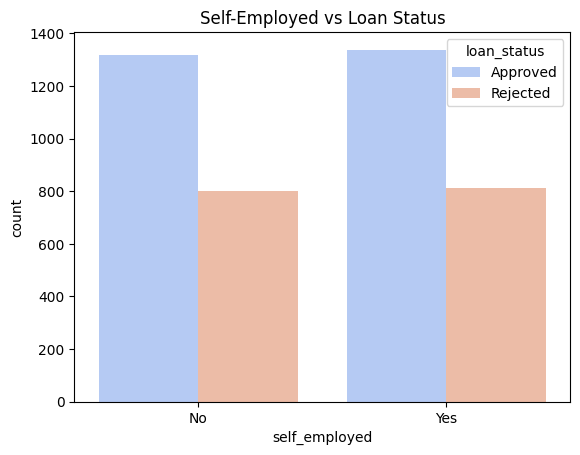

In [72]:
# Plotting a countplot for Self employed with hue = 'loan_status'
sns.countplot(data=df, x='self_employed', hue='loan_status', palette='coolwarm')
plt.title("Self-Employed vs Loan Status")

In [73]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'loan_status',
       'total_assets'],
      dtype='object')

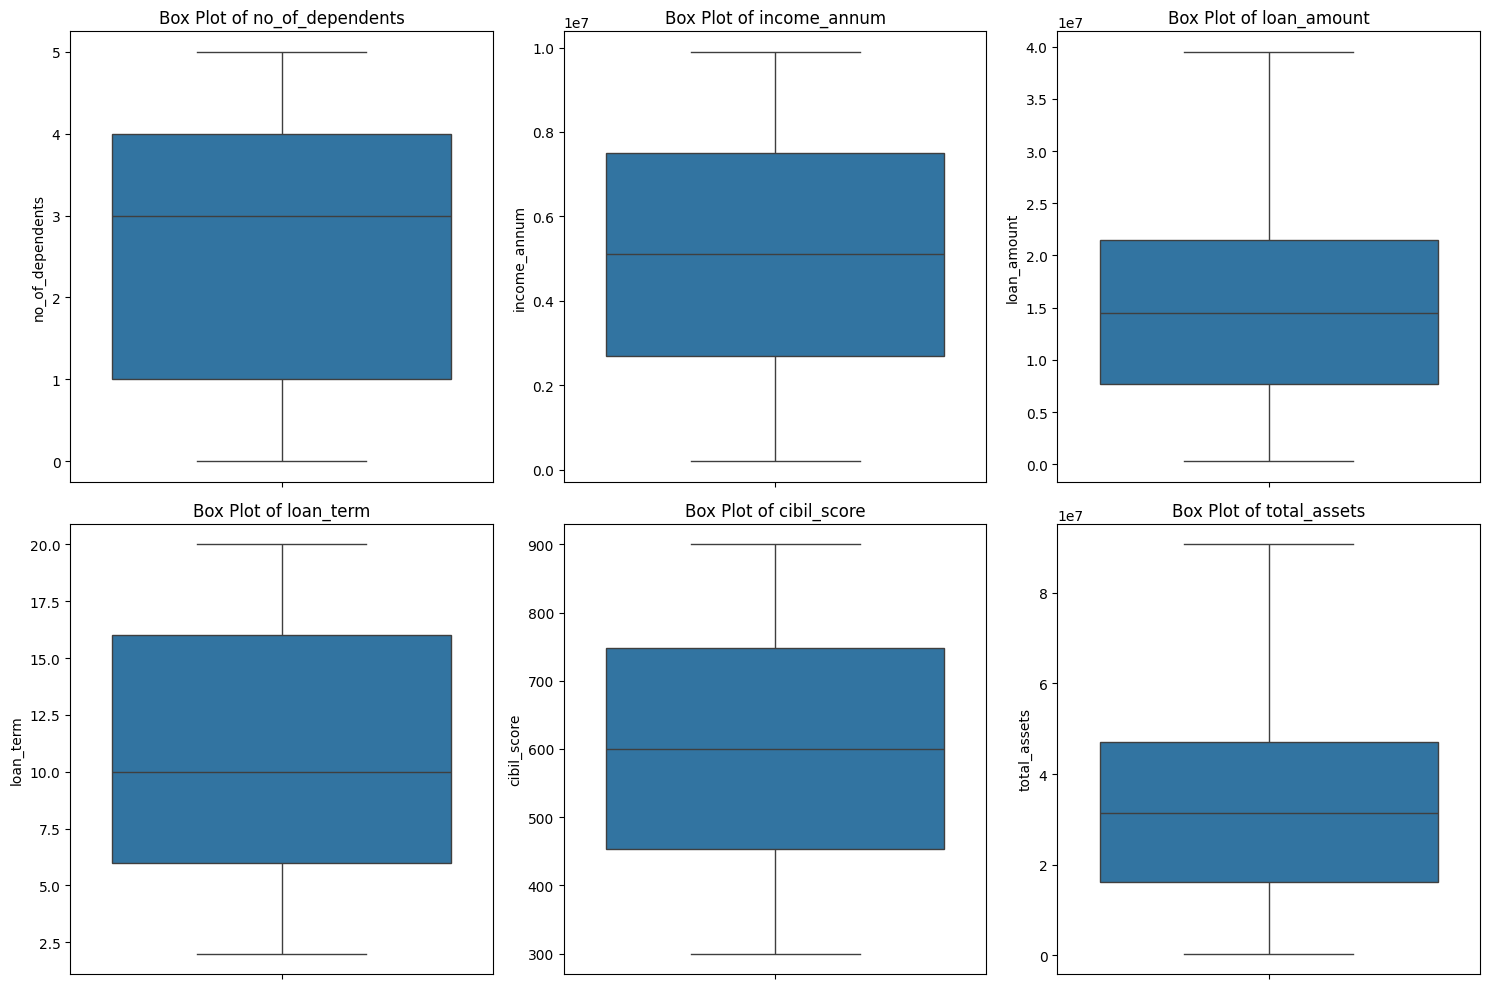

In [74]:
#Plotting Distribution to see the outliers present in the data -

# List of numerical columns to plot
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount',
                     'loan_term', 'cibil_score', 'total_assets']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()

In [75]:
# Function to count outliers in a column
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Count outliers for each numerical column
outlier_counts = {col: count_outliers(col) for col in numerical_columns}

# Display the outlier counts
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

no_of_dependents: 0 outliers
income_annum: 0 outliers
loan_amount: 0 outliers
loan_term: 0 outliers
cibil_score: 0 outliers
total_assets: 0 outliers


# Model Selection and Training -  

In [76]:
# defining x and y variable
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Checking the train columns -
print("Train Data columns:" , X_train.columns)

Train Data columns: Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'total_assets'],
      dtype='object')


In [78]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) ])


In [79]:
# training 5 classification models -
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [80]:
# Evaluate each model
results = []
for name, model in models.items():
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Append the results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the evaluation metrics
print("Evaluation Metrics for All Models:\n")
print(results_df)

Evaluation Metrics for All Models:

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.905152   0.904841  0.905152  0.904932
1        Decision Tree  0.988290   0.988287  0.988290  0.988283
2        Random Forest  0.978923   0.978995  0.978923  0.978867
3                  SVM  0.937939   0.938081  0.937939  0.937998
4    Gradient Boosting  0.983607   0.983610  0.983607  0.983585


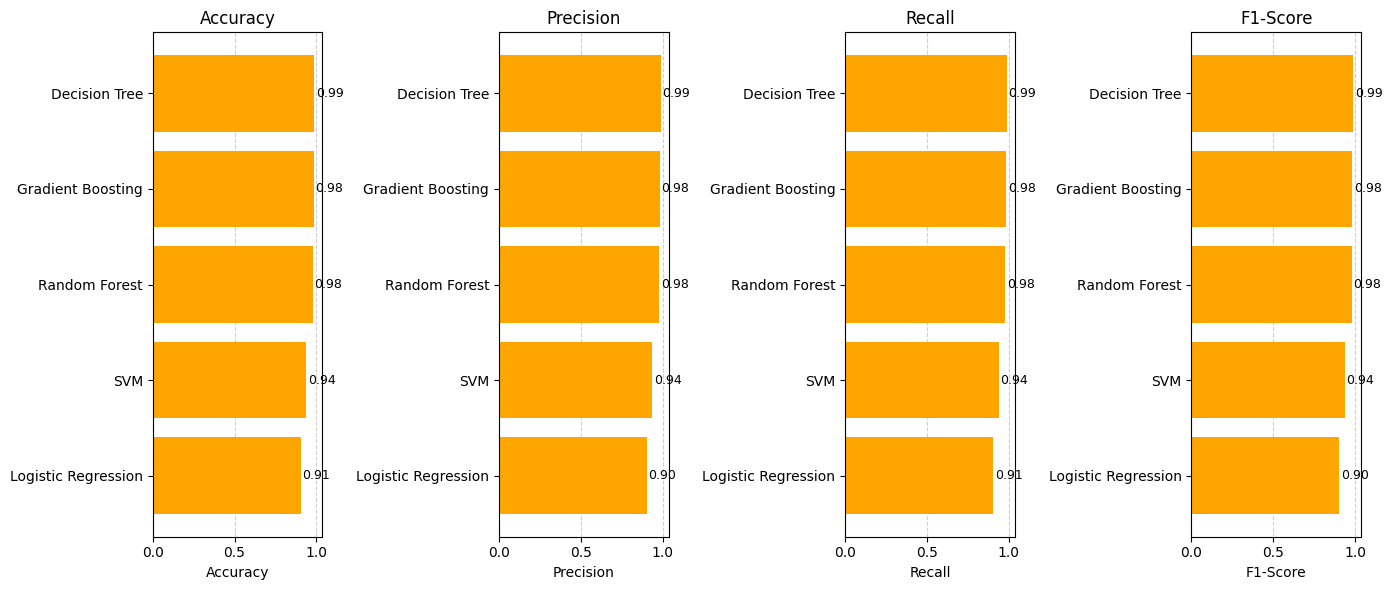

In [81]:
# Define the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(14, 6))

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i+1)

    # Get model names and metric values
    model_names = results_df['Model'].tolist()
    values = results_df[metric].tolist()

    # Sort models by metric values
    sorted_indices = np.argsort(values)
    sorted_models = [model_names[i] for i in sorted_indices]
    sorted_values = [values[i] for i in sorted_indices]

    # Plot horizontal bar chart
    bars = plt.barh(sorted_models, sorted_values, color='orange')
    plt.title(f'{metric}', fontsize=12)
    plt.xlabel(metric)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Add values on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()

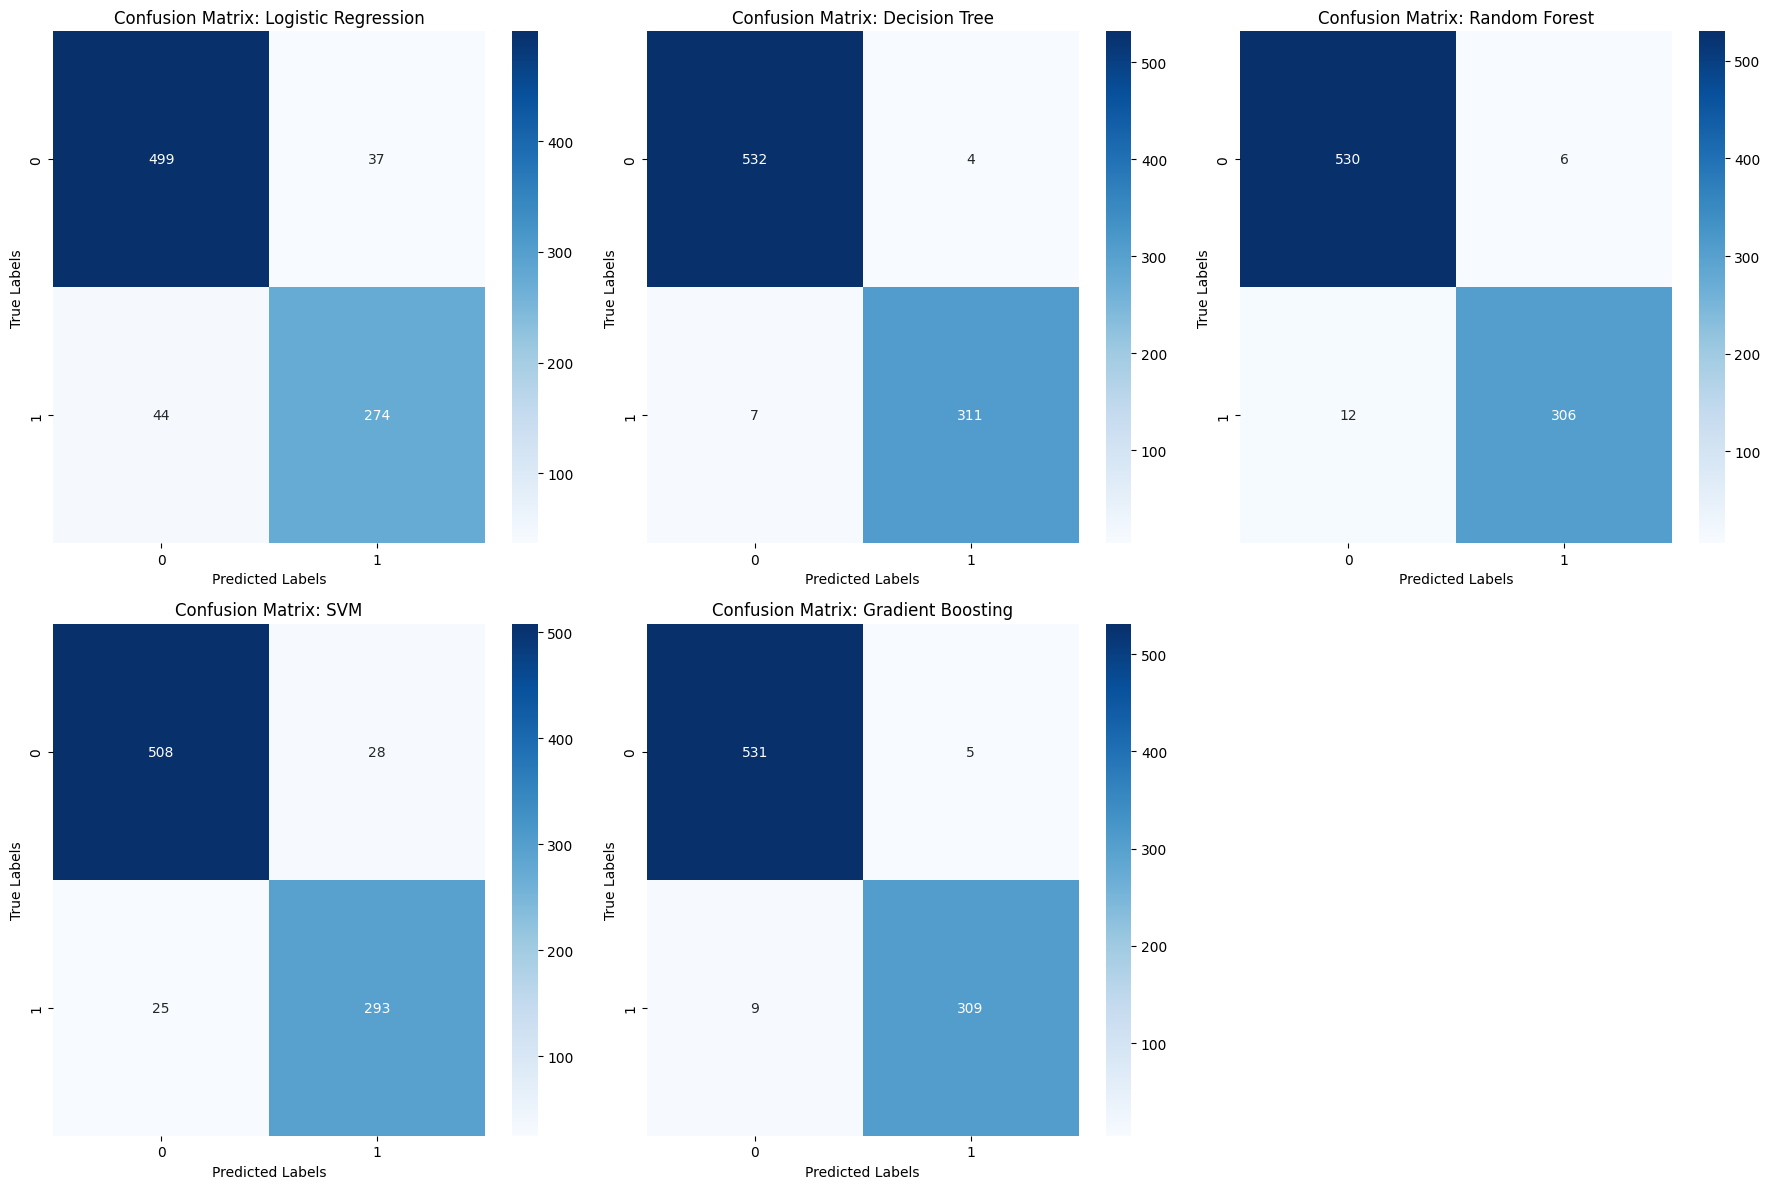

In [82]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Iterate over each model and plot its confusion matrix
for idx, (name, model) in enumerate(models.items()):
    # Create a pipeline with the preprocessor and the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix: {name}')
    axes[idx].set_xlabel('Predicted Labels')
    axes[idx].set_ylabel('True Labels')

# Remove any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()



In [83]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['liblinear', 'lbfgs'],
        'classifier__max_iter': [1000]
    },
    'Decision Tree': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 3, 5]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 3]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto', 0.1, 1]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5]
    }
}

In [88]:
best_models = {}

for name, model in models.items():
  print(f"\n--- Tuning {name} ---")

  if name in param_grids:
    pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', model)
    ])

    grid_search = GridSearchCV(estimator=pipeline,
      param_grid=param_grids[name],
      cv=5,
      scoring='accuracy',
      n_jobs=1,
      verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)
  else:
    print(f"No hyperparameter grid defined for {name}.")
    best_models[name] = pipeline

# Create DataFrame if not already done
tuned_results_df = pd.DataFrame(results)  # 'results' should be updated in your tuning loop as before

# Define metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(18, 6))


--- Tuning Logistic Regression ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

--- Tuning Decision Tree ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits

--- Tuning Random Forest ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits

--- Tuning SVM ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Tuning Gradient Boosting ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


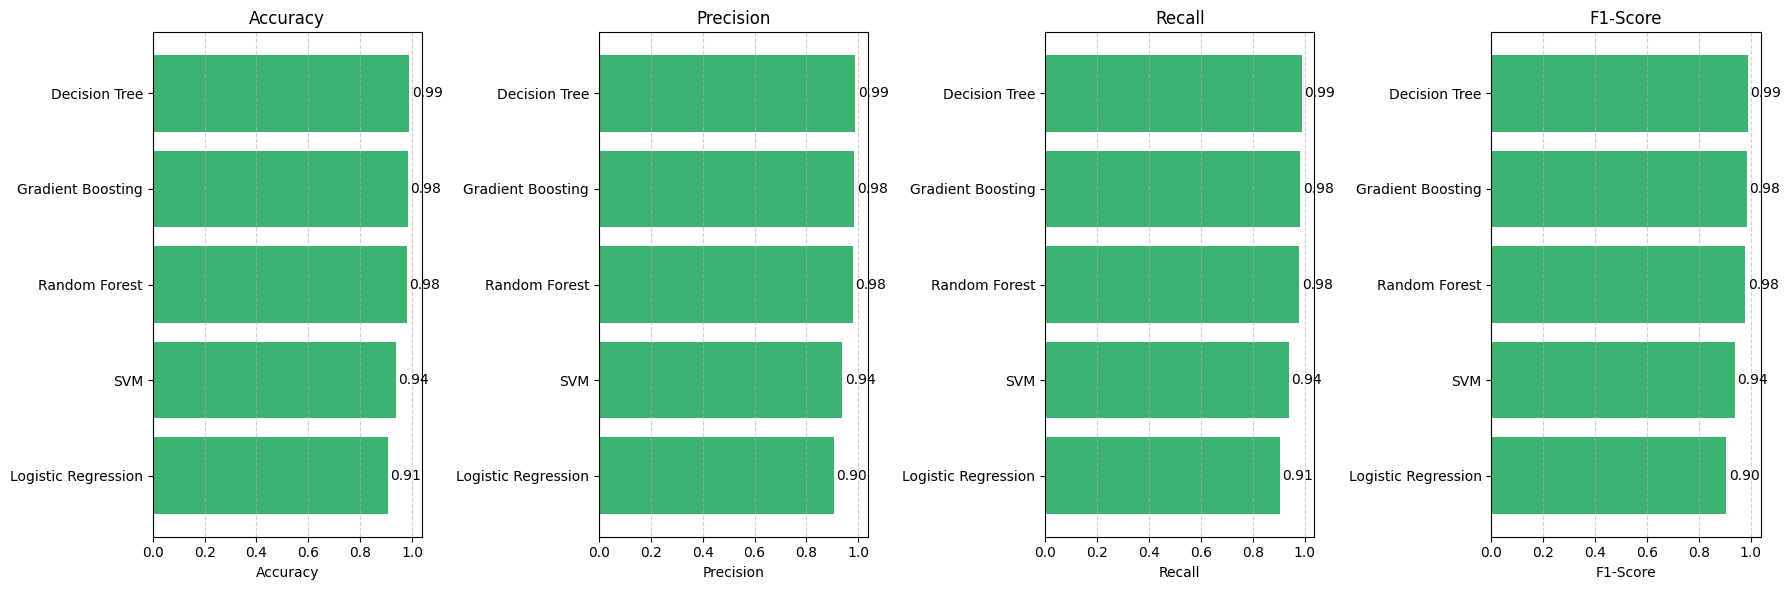

In [89]:
# Create DataFrame if not already done
tuned_results_df = pd.DataFrame(results)

# Define metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(18, 6))

# Create subplots for each metric
for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i+1)

    # Get model names and metric values
    model_names = tuned_results_df['Model'].tolist()
    values = tuned_results_df[metric].tolist()

    # Sort values and models accordingly
    sorted_indices = np.argsort(values)
    sorted_models = [model_names[i] for i in sorted_indices]
    sorted_values = [values[i] for i in sorted_indices]

    # Bar chart
    bars = plt.barh(sorted_models, sorted_values, color='mediumseagreen')
    plt.title(f'{metric}', fontsize=12)
    plt.xlabel(metric)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Add values on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()